# Start DBSCAN

In [1]:
#use BDscan
#try different min_points
#select best epsilon by knn
#select best score
#try pca on kmeans, her, DBscan
#show difference on the score

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [3]:
#csv with decimal & null filed
df = pd.read_csv('processed_df.csv')

In [4]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.099,0.272,0.571
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.099,0.272,0.571


In [5]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['Country'] = labelencoder.fit_transform(df['Country'])
df['Region'] = labelencoder.fit_transform(df['Region'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    int32  
 1   Region                              227 non-null    int32  
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       227 non-null    float64
 7   Infant mortality (per 1000 births)  227 non-null    float64
 8   GDP ($ per capita)                  227 non-null    float64
 9   Literacy (%)                        227 non-null    float64
 10  Phones (per 1000)                   227 non-null    float64
 11  Arable (%)                          227 non-n

In [6]:
from sklearn.preprocessing import StandardScaler

z = StandardScaler()
df = z.fit_transform(df)
df

array([[-1.72443736, -1.70711389,  0.01969468, ...,  1.63657562,
        -0.31540576, -1.1611354 ],
       [-1.70917685, -0.81353621, -0.21387688, ...,  0.59516349,
        -0.70631815,  0.08342432],
       [-1.69391635,  0.08004147,  0.03561811, ..., -0.32662697,
         2.39091078, -1.67396905],
       ...,
       [ 1.69391635, -0.21781776, -0.06192308, ..., -0.08738364,
         1.4286649 , -1.0798325 ],
       [ 1.70917685,  0.97361915, -0.14654488, ...,  0.51072467,
         0.06047154, -0.47944188],
       [ 1.72443736,  0.97361915, -0.14029829, ...,  0.22222537,
        -0.29285312,  0.08342432]])

In [7]:
clustering = DBSCAN(eps=4, min_samples=3).fit(df)
labels = clustering.labels_
print(set(labels))
metrics.silhouette_score(df, labels)

{0, 1, -1}


0.2386930108712049

# Use KNN

C:\Users\ahmed eltabakh\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


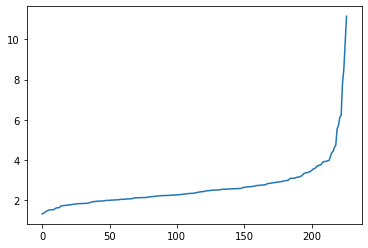

In [8]:
# we ask for mins + 1 nearest, because the data point it self (distance = 0) is included
mins = 2
nn = NearestNeighbors(mins + 1)

nn.fit(df)

distances, neighbors = nn.kneighbors(df)

# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

plt.plot(np.arange(0,len(distances)), distances)
plt.show()

In [9]:
#2, 4
clustering = DBSCAN(eps=4, min_samples=2).fit(df)
labels = clustering.labels_
print(set(labels))
metrics.silhouette_score(df, labels)

{0, 1, 2, -1}


0.15559006533065442

In [10]:
list(labels).count(-1)

10

# Kmeans before PCA

In [11]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df)
labels = kmeans.labels_

metrics.silhouette_score(df, labels)

0.16194496246129045

# Hierarchical before PCA

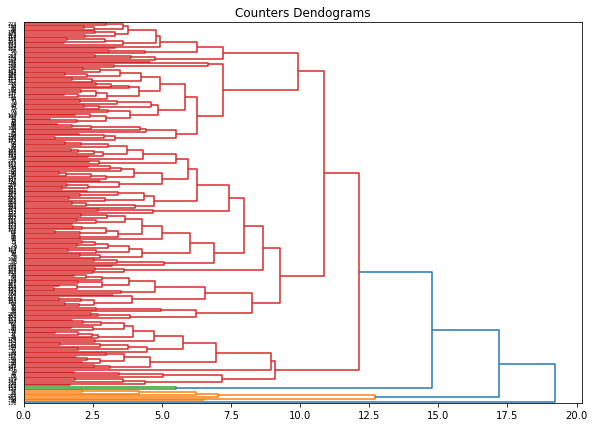

In [12]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")

dend = shc.dendrogram(shc.linkage(y=df , method='complete',metric='euclidean'),orientation='right') 

In [13]:
clustering = AgglomerativeClustering(n_clusters=4).fit(df)
labels = clustering.labels_

metrics.silhouette_score(df, labels)

0.1604550127924883

# Use PCA with kmeans, herarchical, DBscan

### import output transformed data from PCA

In [14]:
transformed_data = pd.read_csv('transformed_x_df.csv')
transformed_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,287547.815819,-1.108696e+06,-1.336486e+07,1.615865e+06,1.631242e+07,-6.847497e+06,-836241.297061,-625349.804500,-312478.969150,-2.028130e+06,-2.192557e+06,1.604479e+07
1,31902.511330,-1.340005e+05,-1.524441e+06,1.871190e+05,1.860862e+06,-7.725766e+05,-104891.382881,-68415.399601,-31527.703414,-2.345787e+05,-2.633235e+05,1.872178e+06
2,292799.350467,-9.133595e+05,-1.478276e+07,1.720098e+06,1.804634e+07,-7.920357e+06,-584139.064896,-795324.782656,-470686.715866,-2.130132e+06,-1.940742e+06,1.621627e+07
3,-2276.804084,-5.238994e+02,-2.394319e+04,4.674294e+03,2.987503e+04,-1.372174e+04,-2243.131311,-813.100286,787.918637,-3.999377e+03,-4.411847e+03,3.077232e+04
4,-5904.468258,1.275983e+03,-2.910640e+04,7.762555e+03,3.669344e+04,-1.854680e+04,-3009.689283,-995.486419,2584.905139,-5.282763e+03,-5.651663e+03,3.829115e+04


In [15]:
z = StandardScaler()
transformed_data = z.fit_transform(transformed_data)
transformed_data

array([[ 0.02241675, -0.01894687, -0.0199416 , ..., -0.01961345,
        -0.01881315,  0.01943469],
       [-0.21005999,  0.19982624,  0.216669  , ...,  0.21327813,
         0.203516  , -0.21088905],
       [ 0.02719235,  0.024897  , -0.04827591, ..., -0.03285832,
         0.01020658,  0.02222138],
       ...,
       [-0.05898798,  0.06078538,  0.06203912, ...,  0.06192344,
         0.06140227, -0.06178715],
       [-0.14520479,  0.1555016 ,  0.14452154, ...,  0.14700901,
         0.15367318, -0.14866103],
       [-0.13730037,  0.13661503,  0.14092691, ...,  0.14018064,
         0.13783736, -0.13960943]])

## kmeans with PCA

In [16]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(transformed_data)
labels = kmeans.labels_

metrics.silhouette_score(transformed_data, labels)

0.9735414732304287

### score highly increased with using PCA output data

# Heirarchical with PCA

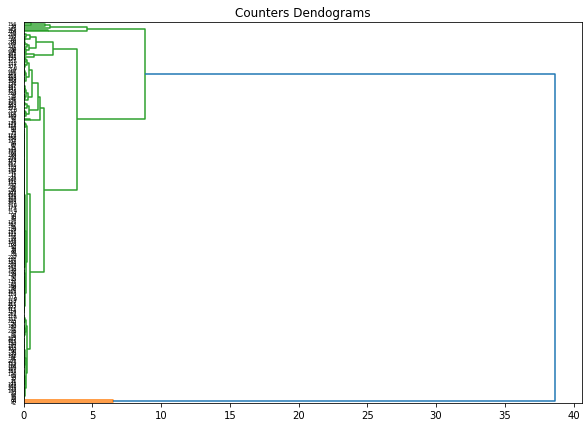

In [17]:
plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")

dend = shc.dendrogram(shc.linkage(y=transformed_data , method='complete',metric='euclidean'),orientation='right') 

In [18]:
clustering = AgglomerativeClustering(n_clusters=2).fit(transformed_data)
labels = clustering.labels_

metrics.silhouette_score(transformed_data, labels)

0.9735414732304287

## score highly increased with using PCA

C:\Users\ahmed eltabakh\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_neighbors=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


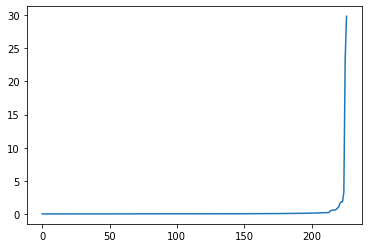

In [26]:
#KNN
mins = 2

nn = NearestNeighbors(mins + 1)

nn.fit(transformed_data)

distances, neighbors = nn.kneighbors(transformed_data)

# sort the distances
distances = np.sort(distances[:, mins], axis = 0)

plt.plot(np.arange(0,len(distances)), distances)
plt.show()

In [47]:
clustering = DBSCAN(eps=0.2, min_samples=2).fit(transformed_data)
labels = clustering.labels_
print(set(labels))
metrics.silhouette_score(transformed_data, labels)

{0, 1, 2, -1}


0.7150912532295367

# score highly increased using PCA